Please note that each time the code is run, the results of the models might not be exactly aligned with the numbers written in the analysis because the we resampled the dataset to ensure that there are equal number of survived and not-survived.


# **Preprocessing Data:**

In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,r2_score,f1_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import resample
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
# load the training data into data frame
data = pd.read_csv('train.csv')
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### A. Drop Duplicated Values

In [2]:
# Drop duplicated values in training set based on PassengerId
data = data.drop_duplicates(subset=['PassengerId'])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# B. Determine if there are any null values

In [3]:
#See if there are any null values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the table above, it can be observed that the columns 'Age', 'Cabin', and 'Embarked' all have null values in them. First, lets examine the 'Age' feature, which has 177 null values. We can impute the missing values with the mean age of each socio-economic-class.

In [4]:
#Impute the missing values with the mean age of each class
data['Age'] = data.groupby('Pclass')['Age'].transform(lambda y: y.fillna(y.mean()))
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

After imputing the null values for 'Age', there are still 529 rows with NaN for 'Cabin'. However, we can drop this column because it is not a necessary non-numerical category in our analysis. We won't be able to correctly impute the missing value and dropping 529 rows of data will negatively impact our models. Hence, let's remove this feature in our dataset entirely.

In [5]:
#Drop the 'Cabin' column
data = data.drop("Cabin",  axis = 1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


In [6]:
#Check if there are any more null values
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

There is still two rows of data that have NaN values for the 'Embarked' column. Since we have no way of imputing a value for this attribute, the best solution would be to drop the two rows.

In [7]:
#Drop the rows with null values in the 'Embarked' column
data= data.dropna(subset=["Embarked"])
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now the dataset is free of null values. 

# Split the dataset into training and testing sets

In [8]:
# Create a dataFrame that holds the x variables
x = data.drop('Survived', axis=1)

#Create a dataFrame that holds the target variable
y = data['Survived']

#Split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Combine the x_train and y_train into a single dataset for analaysis of features
training = pd.concat([x_train, y_train], axis=1)
training

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
708,709,1,"Cleaver, Miss. Alice",female,22.00000,0,0,113781,151.5500,S,1
240,241,3,"Zabour, Miss. Thamine",female,25.14062,1,0,2665,14.4542,C,0
382,383,3,"Tikkanen, Mr. Juho",male,32.00000,0,0,STON/O 2. 3101293,7.9250,S,0
792,793,3,"Sage, Miss. Stella Anna",female,25.14062,8,2,CA. 2343,69.5500,S,0
683,684,3,"Goodwin, Mr. Charles Edward",male,14.00000,5,2,CA 2144,46.9000,S,0
...,...,...,...,...,...,...,...,...,...,...,...
107,108,3,"Moss, Mr. Albert Johan",male,25.14062,0,0,312991,7.7750,S,1
271,272,3,"Tornquist, Mr. William Henry",male,25.00000,0,0,LINE,0.0000,S,1
862,863,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.00000,0,0,17466,25.9292,S,1
436,437,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.00000,2,2,W./C. 6608,34.3750,S,0


# Relationship between socio-economic status of the passenger and other attributes

## A. Plot #1: Socio-Economic status vs Age


[Text(0.5, 1.0, 'Relationship Between Class and Age')]

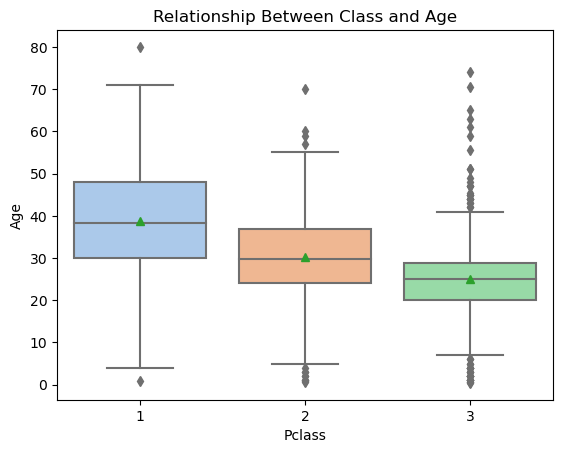

In [9]:
# Plot a box plot that presents the relationship between Age and social class
seaborn.boxplot(x="Pclass", y="Age", palette="pastel", showmeans=True, data=training).set(title="Relationship Between Class and Age")

Based on the boxplot above, it can be concluded that the first class has the greatest variability of ages. It is because the blue boxplot has the largest interquartile range (longer box) and has ages ranging from the single digits to 70s. It can also be noted that the third class has the lowest mean and median age, along with the boxplot present at a lower range compared to the other two classes. This indicates that the passengers in the third class cabin were typically younger. A great portion of the third class passengers were traveling for work/education and migrating to  America for better opportunities. The third boxplot also displays a cluster of outliers in the upper range, which may suggest the presence of a significant number of elderly passengers in the third-class cabins. Since it is more affordable to live in the third class cabin when traveling with family, it is reasonable for the lower average in age and clusters of older passengers in the green boxplot. The second class has an average and median that is between the first and third class. Additionally, the number of outliers in the second class is greater than the first class but less than the third class. One thing that all three classes had in common was the age of the youngest passenger.

## B. Plot #2: Socio-Economic status vs Gender

[Text(0.5, 1.0, 'Relationship between Class and Gender')]

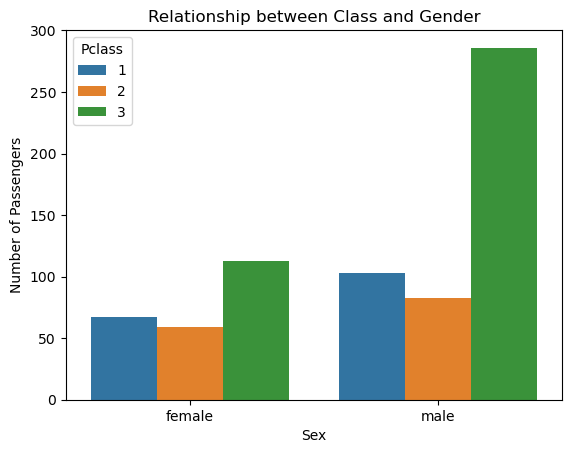

In [10]:
# Plot a box plot that presents the relationship between gender and social class
gender_eco_set = training.groupby(['Sex', 'Pclass']).size().reset_index(name='Number of Passengers')
seaborn.barplot(x='Sex', y='Number of Passengers', hue='Pclass', data=gender_eco_set).set(title="Relationship between Class and Gender")

From the bar graphs above, it can be inferred that there are overall more male survivors than female survivors. In all three classes, the bars representing the males are taller compared to the graphs representing the females. It can also be concluded that the majority of the male survivors were in the third class as it is the tallest bar. Additionally, it can be assumed that there were overall more male passengers on the ship than female passengers because women and children were prioritized first to be saved. Therefore, it can be assumed that most of the women and children survived. However, since the graph shows that there is a substantially greater amount of male survivors than female survivors, it can be assumed that there were more male passengers, especially those in the third class. This might be because many of the male survivors who were traveling either traveled for work purposes or simply chose to sit in the third class cabin due to the cheaper fares.

## C. Plot #3: Socio-Economic status vs Fare

[Text(0.5, 1.0, 'Relationship Between Class and Fare')]

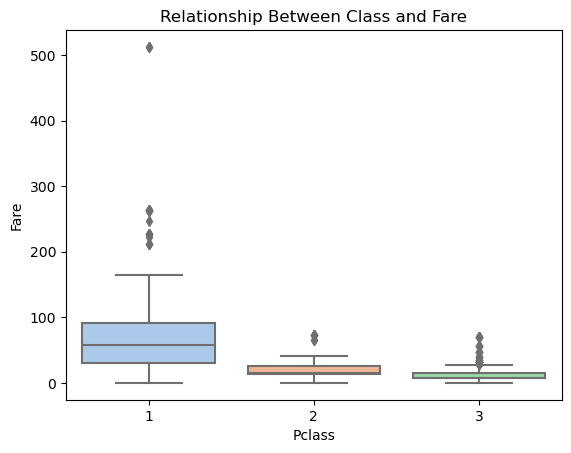

In [11]:
# Plot a box plot that presents the relationship between fare prices  and social class
seaborn.boxplot(x="Pclass", y="Fare", palette="pastel", data=training).set(title="Relationship Between Class and Fare")

From the boxplot above, it can be concluded that the first class has the greatest variability in fares. It is because the blue boxplot has the largest interquartile range (longer box) and has fares ranging from the single digits to almost 200. Whereas the green boxplot has the smallest interquartile range (shortest box) and has fares ranging from the single digits to less than 50. Additionally, the orange boxplot has an interquartile range and fares ranging from the single digits to about 50. It can also be noted that the third class has the lowest mean and median fare. This can be due to the level of comfortability and spaciousness of the room a passenger wants. The rooms of the first class were the biggest and most spacious, therefore, the first class paid the most expensive fare. The rooms of the third class were the smallest and most crammed, therefore, the third class paid the cheapest fare. The rooms of the second class were slighty more spacious but still small, therefore, the second class paid a fare that was in between the other two class'. 

###  Figure 3a:  Gender vs Fare 

[Text(0.5, 1.0, 'Relationship Between Gender and Fare')]

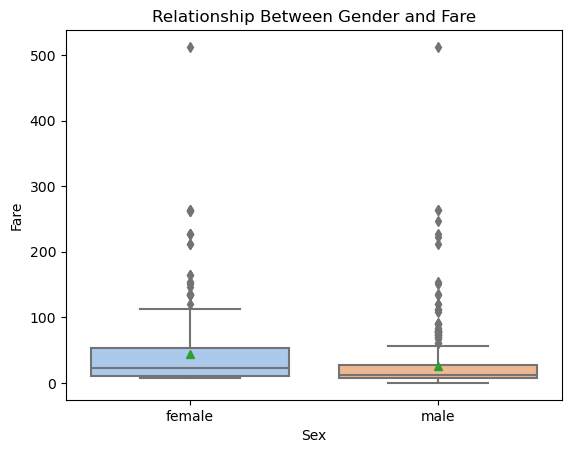

In [12]:
# Plot a box plot that presents the relationship between Age and social class
seaborn.boxplot(x="Sex", y="Fare", palette="pastel", showmeans=True, data=training).set(title="Relationship Between Gender and Fare")

Based on the boxplot above, it can be concluded that the fare for women is greater than the fare for men. It is because the first box has a slighlty larger interquartile range (longer box) and has ages ranging from the single digits to slightly above 100. It can also be noted that the females have a slightly greater mean and median age, along with the box present at a greater range compared to the males. This could be due to type of room the passenger would want. Women on board would typically be with their family. Therefore, the fare would be greater. However, men on board could be traveling for work or trying to look for better job opportunities. Therefore, they would be paying a cheaper fare as it may be just them and they would not need a big room.

## D. Plot #4: Social-Economic Class vs Family members



### Figure 4a: Bar Graph on Siblings/Spouse and Pclass

[Text(0.5, 1.0, 'Pclasss vs Number of Siblings/Spouses')]

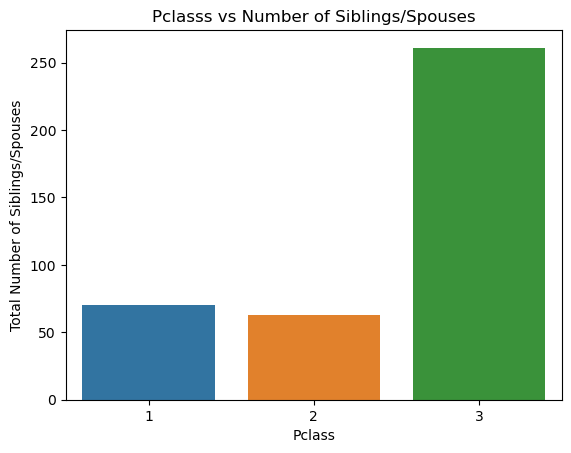

In [13]:
#Group the DataFrame by Pclass status and sum the number of sib/spouse in each group
sib_set = training.groupby('Pclass')['SibSp'].sum().reset_index(name='Total Number of Siblings/Spouses')

# Create a bar graph to model relationship
seaborn.barplot(x='Pclass', y='Total Number of Siblings/Spouses', data=sib_set).set(title="Pclasss vs Number of Siblings/Spouses")

### Figure 4b: Bar Graph on Parents/Children and Pclass

[Text(0.5, 1.0, 'Pclasss vs Number of Parents/Children')]

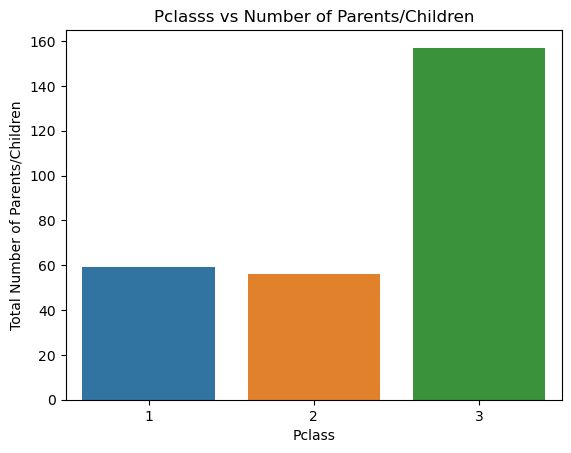

In [14]:
# Group the DataFrame by Pclass status and sum up the number of parent/children in each group
parch_set = training.groupby('Pclass')['Parch'].sum().reset_index(name='Total Number of Parents/Children')

# Create a bar graph to model relationship
seaborn.barplot(x='Pclass', y='Total Number of Parents/Children', data=parch_set).set(title="Pclasss vs Number of Parents/Children")

As can be seen from the figures 4a,  individual's that had the greatest number of siblings/spouses were in the third class as can be seen by the height of the  green bar graph. This indicates that most likely individuals with greater siblings bought third class tickets, due to the cost of third class tickets being affordable for families. When looking at the 1st and 2nd class bar graphs, it can be deduced that mainly couples and or single individuals bought these tickets as the number of sibling/spouse numbers is not higher than a threshold of 60. When analyzing figures 4b, families that had a larger number of children were most likely to be in third class, as indicated before, due to its affordable nature. 

# Relationship between Survival Rate and Different Attributes

## E. Plot #5: Survival Rate vs Age





[Text(0.5, 1.0, 'Relationship Between Age and Survived')]

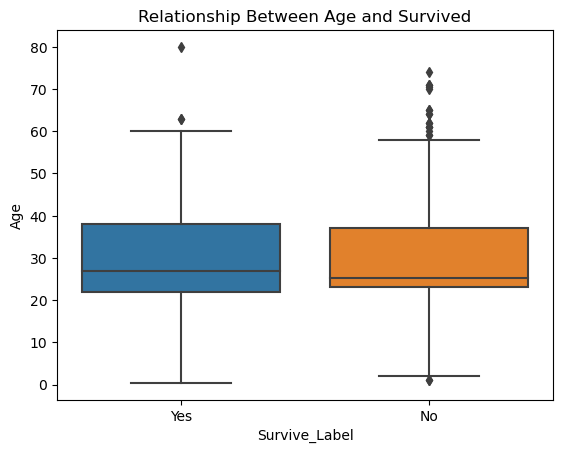

In [15]:
# Add a column that labels the 0s as not-survive and 1s and survived
training['Survive_Label'] = training['Survived'].apply(lambda y: 'Yes' if y == 1 else 'No')
# Plot a box plot between Survival and Age
seaborn.boxplot(x="Survive_Label", y="Age", data=training).set(title="Relationship Between Age and Survived")

Based on the boxplot above, it can be concluded that the range of ages of survivors is slightly bigger than the range of ages of those who died. It is because the first box has a slighlty larger interquartile range (longer box) and has ages ranging from the single digits to slightly above 60. It can also be noted that the survivors have a slightly greater mean and median age, along with the box present at a slightly greater range compared to the deceased group. This does not show a substantial difference in age of those who survived and those who did not. In fact, there were more outliers in those who did not survive. 

## F. Plot #6: Survival Rate vs Gender


### Figure 6A: Bar graph of Survival in Relation To Gender



[Text(0.5, 1.0, 'Survival vs Gender')]

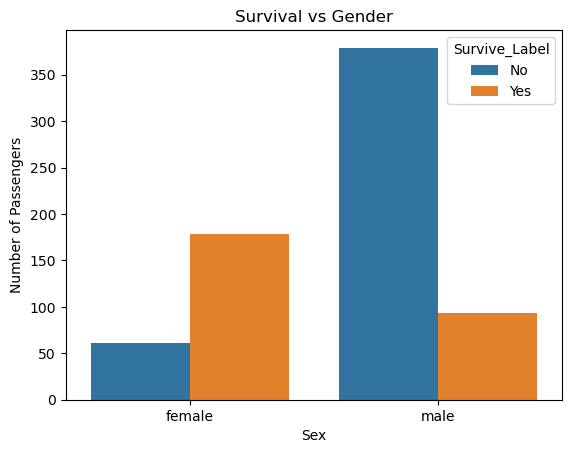

In [16]:
# Group the DataFrame by gender and survival status and count the number of passengers in each group
survive_set = training.groupby(['Sex', 'Survive_Label']).size().reset_index(name='Number of Passengers')

# Create a bar graph to model relationship
seaborn.barplot(x='Sex', y='Number of Passengers', hue='Survive_Label', data=survive_set).set(title="Survival vs Gender")

### Figure 6B: Pie chart of Percentage of Women vs Men who survived

Text(0.5, 1.0, 'Survival Rate by Gender')

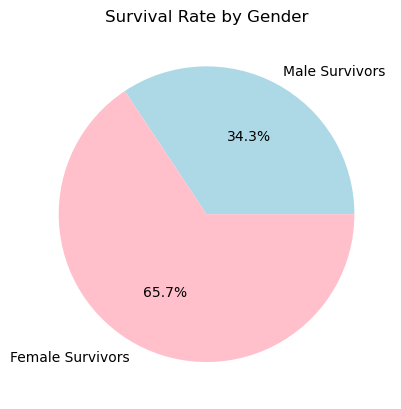

In [17]:
#Group the data the by 'Sex' and take the sum
fmdata=training.groupby(['Sex']).sum()

#Find the total number of survivors
totalsize = fmdata.loc["female" , "Survived"] + fmdata.loc["male" , "Survived"]

#Find the percentage of the female survivors
femalepercentage = fmdata.loc["female" , "Survived"]/totalsize * 100

#Find the percentage of the male survivors
malepercentage = fmdata.loc["male" , "Survived"]/totalsize * 100

#Add labels to the graph 
labels = 'Male Survivors', 'Female Survivors'

#Add the percentages to the graph
percentages = [malepercentage, femalepercentage]

#Plot the pie chart
fig, ax = plt.subplots()
ax.pie(percentages, labels=labels,autopct='%1.1f%%', colors=["lightblue","pink"])
ax.set_title('Survival Rate by Gender')

According to the pie chart, it is visualized that a significant number of women survived as opposed to men. Additionally, from the bar graph above, it can be inferred that there were more deaths than survivals, more specifically, there were more male deaths than female deaths. When looking within each gender, there were more males who died than survived as it is the tallest bar within the male category. However, there were more females who survived than died as it is the tallest bar within the females category. This could be due to the fact that women and children were prioritized first to be saved. Therefore, it can be assumed that most of the women and children survived. Furthermore, it can be concluded that there were overall more male passengers on the ship than female passengers since the bar graph shows that there is a substantially greater amount of deaths of males than combined amount of deaths and survivals of females.

##G. Plot #7: Survival vs Social-Economic Class


### Figure 7A: Bar Graph of Social-Class and Number of Survivals

[Text(0.5, 1.0, 'Relationship Between Class and Number of Survivals')]

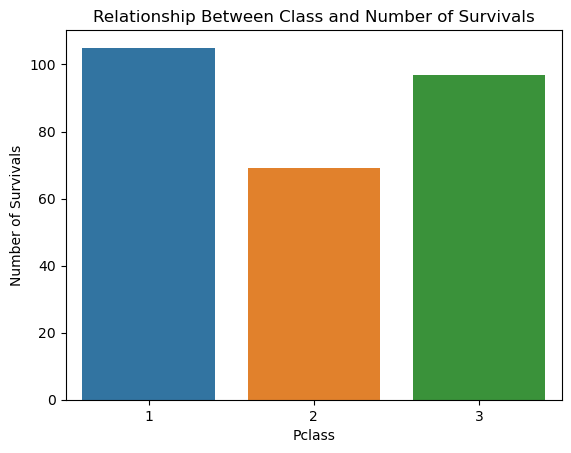

In [18]:
# Count the number of Survivals of each social-class
classSurvive=training.groupby('Pclass')['Survived'].sum().reset_index(name="Number of Survivals")

# Plot the relationship
seaborn.barplot(x="Pclass", y="Number of Survivals", data=classSurvive).set(title="Relationship Between Class and Number of Survivals")

Let's analyze the relationship between survival rate vs social-class even further by creating two pie charts: one indicating the survival percentage of each class, the other displaying what fraction of the total survival rate came from each class.

### Figure 7B: Pie Graph of Survival Percentage of Each Social-Class

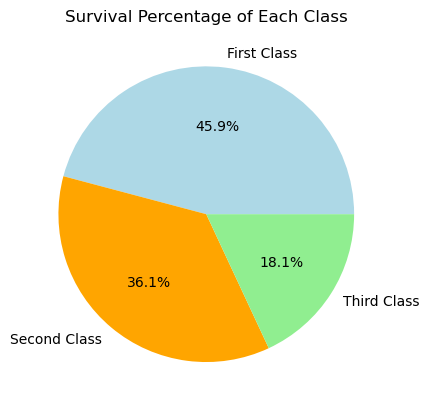

In [19]:
# Create a dataFrame that counts the number of people in each class
class_count=training.groupby("Pclass")["Survived"].count()

# Create a dataFrame that sums the number of survivals of each class
survived=training.groupby("Pclass")["Survived"].sum()

#Calculate the survival rate
survival_rate = survived / class_count * 100

#Create labels 
classes = ['First Class', 'Second Class', 'Third Class']

#Plot the pie graph
fig, ax = plt.subplots()
ax.pie(survival_rate, labels=classes, autopct='%1.1f%%', colors=["lightblue","orange", "lightgreen"])
ax.set_title("Survival Percentage of Each Class")
plt.show()

### Figure 7C: Pie Graph of Percentage of Total Survival From Each Class



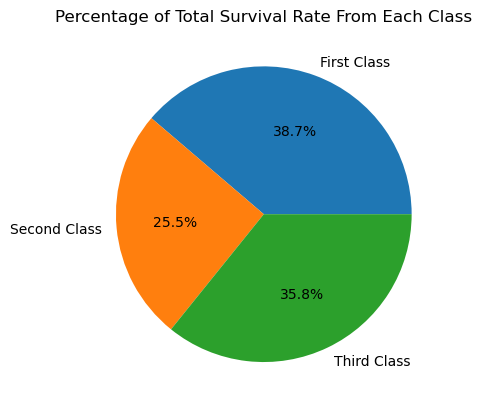

In [20]:
# Create a dataFrame that counts the total number of survivors from each class
class_survive_count=training.groupby("Pclass")["Survived"].sum()

#Creates a dataFrame that counts the total number of survivors
total_survived=training["Survived"].sum()

#Calculates the survival rate
survival_rate = class_survive_count / total_survived  * 100

#Plot pie graph
fig, ax = plt.subplots()
ax.pie(survival_rate, labels=classes, autopct='%1.1f%%')
ax.set_title("Percentage of Total Survival Rate From Each Class")
plt.show()

According to Figure 7A, it can be inferred that the first class had the highest number of passengers who survived. The third class had the second highest survival count, whereas the second class passengers had the lowest number of passengers who survived. We can further analyze this relationship with Figure 7B and 7C. The Figure 7B suggests that the first class had a survival rate of 45.9% (highest), second class with 36.1%, and third class with only 18.1% survived. Although the bar graph indicates that the third class had the highest count of survived passengers, that only made up 18.1% of the total passengers aboard the third class. With the great number of passengers aboard in the third class cabin, it might be misleading to base the survival rate based on the figure 7A. Therefore, combined with figure 7b, it can be concluded that in terms of social class, the third class had the lowest survival rate. Moreover, the third graph provides additional insight on the percentage of the total survival that came from each class. 38.7% of the people who survived came from the first class, 35.8% from the third class, and 25.5% from the second class. This reinforces the fact that the first class cabins, known to have better accomodations, were closer to the rafts. Hence, a great proportion of the first class was able to survive. As previously mentioned, priority were given to children and women in the saving process. Previously proven by figures 4a and 4b, the third class had the highest number of family members aboard. The third class, therefore, had the third class make up the second greatest portion of the survivals.

# Ensuring Balanced Class for Survived

Inorder for our models to be more accurate, we should ensure that the target classification column 'Surivived' have a same number of data rows that categorize as 0s and 1s.

In [21]:
#Drop the unimportant columns
new_training=training.drop(columns=['PassengerId', 'Name','Ticket','Embarked'])

#Classify the gender with 0=Male and 1=Female
new_training['Gender']= new_training['Sex'].apply(lambda y: 1 if y=="female" else 0)

#Add a new 'Gender' column in the testing dataset
x_test["Gender"]= x_test['Sex'].apply(lambda y: 1 if y=="female" else 0)


In [22]:
# Count the number of rows that fall into each classification
classification=new_training['Survived'].value_counts().reset_index()

# Give the columns the appropriate names
classification.columns = ['classification', 'count']
classification

,classification,count
0,0,440
1,1,271


The table above suggests that the Survived column is not balanced. Let's resample the minority class so that it also has 440 data rows. We chose to increase the minority class size instead of decreasing the majority class because removing the 169 rows would mean deleting valuable datset, which can also lead to overfitting.

In [23]:
# Create dataFrames for majority and minority data
major = new_training[new_training['Survived'] == 0]
minor = new_training[new_training['Survived'] == 1]

#Resample the minority class data so that it is balanced with the majority class
newSample_minor = minor.sample(n=len(major), replace=True)

# Combine the newly sampled minority data with majority data
training_sampled = pd.concat([newSample_minor, major])
training_sampled

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Survive_Label,Gender
677,3,female,18.00000,0,0,9.8417,1,Yes,1
596,2,female,29.87763,0,0,33.0000,1,Yes,1
288,2,male,42.00000,0,0,13.0000,1,Yes,0
827,2,male,1.00000,0,2,37.0042,1,Yes,0
449,1,male,52.00000,0,0,30.5000,1,Yes,0
...,...,...,...,...,...,...,...,...,...
122,2,male,32.50000,1,0,30.0708,0,No,0
20,2,male,35.00000,0,0,26.0000,0,No,0
72,2,male,21.00000,0,0,73.5000,0,No,0
436,3,female,21.00000,2,2,34.3750,0,No,1


In [24]:
# Count the number of rows that fall into each classification
classification=training_sampled['Survived'].value_counts().reset_index()

# Give the columns the appropriate names
classification.columns = ['classification', 'count']
classification

,classification,count
0,1,440
1,0,440


Now the dataset has an equal number of 0s and 1s for the 'Survived' column. It is now ready for analysis.

# Correlation Analysis

Since there are important classification variables in the dataset, we decided to perform correlation analysis using two different methods, pearson and spearman, to see which one would be more appropriate.

[Text(0.5, 1.0, 'Heatmap of Correlations Among Different Features')]

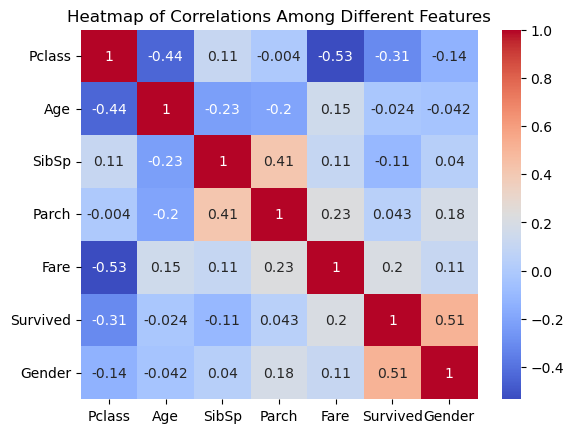

In [25]:
# Build a correlation using pearson correlation on the newly sampled dataset
corr=training_sampled.corr(method="pearson")

#Display the heatmap
seaborn.heatmap(corr,annot=True, cmap='coolwarm').set(title="Heatmap of Correlations Among Different Features")

[Text(0.5, 1.0, 'Heatmap of Correlations Among Different Features')]

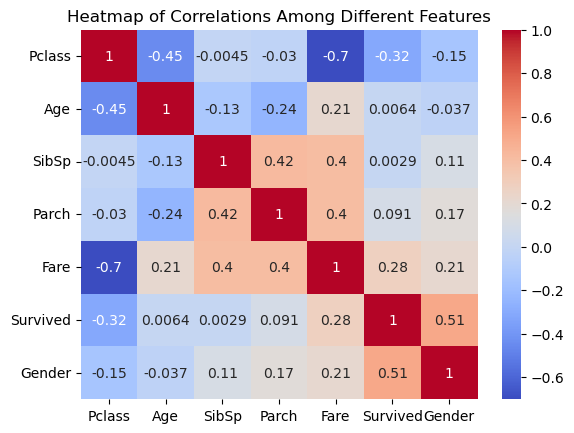

In [26]:
# Build a correlation using spearman correlation on the newly sampled dataset
corr=training_sampled.corr(method="spearman")

#Display the heatmap
seaborn.heatmap(corr,annot=True, cmap='coolwarm').set(title="Heatmap of Correlations Among Different Features")

The two heatmaps above give similar correlation results. The top three features correlated with 'Surivived" from the pearson correlation matrix are Gender(0.51), Fare(0.22), and Pclass(-0.34). The top three from the spearman correlation are Gender(0.51), Fare(0.32), and PClass(-0.34). The results are reasonable because as analyzed above, fare and Pclass has the correlation where the first class had the most expensive ticket price, whereas the third class had the cheapest fare. Since Pclass and surivival rate also have an important correlation, it is logical for fare and Pclass to be significant factors in the prediction of the 'Survived' column. Moreover, as explained by the previous graphs, females were prioritized in the rescue. This means that gender also plays a great role in predicting a passenger's surivival. Hence, we will build our models based on these three features.

# Models:

## A. Logistic Regression

Since we are trying to classify the passengers into the classes (0=Not survived and 1=Survived), logistic regression would be a great algorithm to use for our analysis as this method specializes in determining the best separating boundary for the labels in the dataset. Logistic regression uses the sigmoid function f(x)=1/1+e^-h(x,w)to determine the probability of x being in a certain class. Note that the h(x,w)= w0 + Σ(wi*xi) represents a linear regression line consisting of the independent variables, xi and the their parameters, wi. In our case, we will be using three attributes (Gender, Fare, and Pclass) to construct an appropriate boundary line between the survived (1) vs not-survived (0) labels by finding the best values for the coefficients that will give a high probability for the survived category. The algorithm uses methods such as maximum likelihood and gradient descent to minimize the cost function (-1/n[yilog(f(xi,w)) + (1-yi)log(1-f(xi,w))]).The logistic regression function tool in Skitlearn uses this algorithm to build the model that gives the best results using the provided independent variables.


In [27]:
# Store only the'Gender','Fare','Pclass' columns of the training dataset as the x for training
X_train = training_sampled[['Gender','Fare','Pclass']]

# Store the surived column as the y for training
y_train=training_sampled['Survived']

# Store only the 'Gender','Fare','Pclass' columns  of the testing dataset as the y for testing
X_test = x_test[['Gender','Fare','Pclass']]

#Build a logistic regression model using the x and y from the training set
lmodel = LogisticRegression().fit(X_train, y_train)

#Using the previously constructed model to predict the classification values of the testing set
lpredict = lmodel.predict(X_test)

#Calculate the F1 score 
fscore=f1_score(y_test, lpredict)
print(f"f1_score: {fscore}")

#Calculate the precision
precision = precision_score(y_test, lpredict)
print(f"Precision: {precision}")

#Calculate the recall
recall= recall_score(y_test, lpredict)
print(f"Recall: {recall}")

#Calculate the accuracy
accuracy = accuracy_score(y_test, lpredict)
print(f"Accuracy: {accuracy}")

f1_score: 0.7329192546583851
Precision: 0.6413043478260869
Recall: 0.855072463768116
Accuracy: 0.7584269662921348


Based on the logistic regression results above, it can be concluded that the model is great at predicting the classification for the testing data set. This is because the model has a high f1_score greater than 0.70, which indicates that the models is very accurate. In addition, its precision is 
0.64, recall is 0.85, and accuracy is 0.75. All these metrics are high, suggesting that the model is effective in making correct predictions with minimal false positive cases.

## B. K-Nearest Neighbors

The k-nearest neighbors(kNN) model can be used as a classification model that can be used to classify a particular data point's label based on the classification data of it's k nearest neighbors, for k>=1. In order to find the nearest neighbors to a data point, we have to compute the distance between the specific data point and it neighboring data points. The main formula that drives the kNN model is the distance metric that is being used. The formula is d(x,y) = (Σ|x_i -y_i|^p)^1/p for i = 0 to d, where p is determines the dimensionality aspect of the model. Afterwards, we look at the distances that we obtained and determine what are k nearest neighbors of the data point. Then, since we are classifying a data point's label using this information, we will give the data point the label that is the mode label of the k nearest neighbors. For our data, we will be focusing on predicting the label of the Survival column using the kNN classifier model using the "Gender", "Fare", and "Pclass" columns of the testing dataset. 

In [28]:
neighbors = KNeighborsClassifier(n_neighbors = 5)
# Store only the'Gender','Fare','Pclass' columns of the training dataset as the x for training
X_train = training_sampled[['Gender','Fare','Pclass']]

# Store the surived column as the y for training
y_train=training_sampled['Survived']

# Store only the 'Gender','Fare','Pclass' columns  of the testing dataset as the y for testing
X_test = x_test[['Gender','Fare','Pclass']]

#Build a KNeighborsClassifier model using the x and y from the training set
kNclassifier = neighbors.fit(X_train, y_train)

#Test the  KNeighborsClassifier model
predictvals = kNclassifier.predict(X_test)
print(predictvals)

[1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1
 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1
 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1]


In [29]:
#Calculate the F1 score 
fscore=f1_score(y_test, predictvals)
print(f"f1_score: {fscore}")
#Calculate the precision
precision = precision_score(y_test, predictvals)
print(f"Precision: {precision}")
#Calculate the recall
recall= recall_score(y_test, predictvals)
print(f"Recall: {recall}")
#Calculate the accuracy
accuracy = accuracy_score(y_test,predictvals )
print(f"Accuracy: {accuracy}")

f1_score: 0.5813953488372093
Precision: 0.4854368932038835
Recall: 0.7246376811594203
Accuracy: 0.5955056179775281


When compared to the logistic regression model, the k-nearest neighbor model does not predict with a high enough f1_score, precision, recall, or accuracy.All of these performance measures of the kNN classifier model is less than the values obtained  for the  logistic regression model. Thus, this model is not as effective at predicting the label of the dataset.

## C. Decision-Tree

Decision tree is a ML algorithm that predicts the classification of the target variable using both categorical and numerical features. Besides classification problems, decision trees (regression trees) can also be applicable in predicting numerical target attributes. Having a tree-like structure, the model consists of a root node, internal nodes, and leaf nodes. It first determines the root feature within the given group of independent variables based on properties such as Gini impurity, gain, or gain ratio. Gini impurity, which is the probability of misclassification, is the default measurement factor in Skitlearn used when selecting the best feature to use at each node. The main goal is to determine the feature that will give the lowest value of 'impurity.' Upon determining the feature of the root node, the dataset gets branches off to two different internal nodes based on the value of the selected predictor. The process of deciding a feature and partioning the dataset repeats again until it reaches a terminating condition. In our case, it would be the maximum depth specified. However, there are also other possible halting criterion such as having the max number of nodes and reaching the threshold of the min number of samples for the leaf nodes. 

In [30]:
# Construct the decision tree 
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=3).fit(X_train,y_train)

#Use the tree to predict values
y_pred = decision_tree.predict(X_test)

#Calculate the f1_score
fscore=f1_score(y_test, y_pred)

#Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

#Calculate the precision
precision = precision_score(y_test, y_pred)

#Calculate the recall 
recall= recall_score(y_test, y_pred)

#Print the values
print(f"f1_score: {fscore}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")


f1_score: 0.7388535031847134
Precision: 0.6590909090909091
Recall: 0.8405797101449275
Accuracy: 0.7696629213483146


Compared to the two previous models above, the decision tree performs the best when classifying the passengers into the categories of survived vs not survived. This can be supported through its f-score metric, which is the highest out of all three models. It might be because decision tree are known to perform well with both numerical and categorical features, along with non-linear relationships. Hence, the third model is the best to use when determining whether the passenger survived or not.

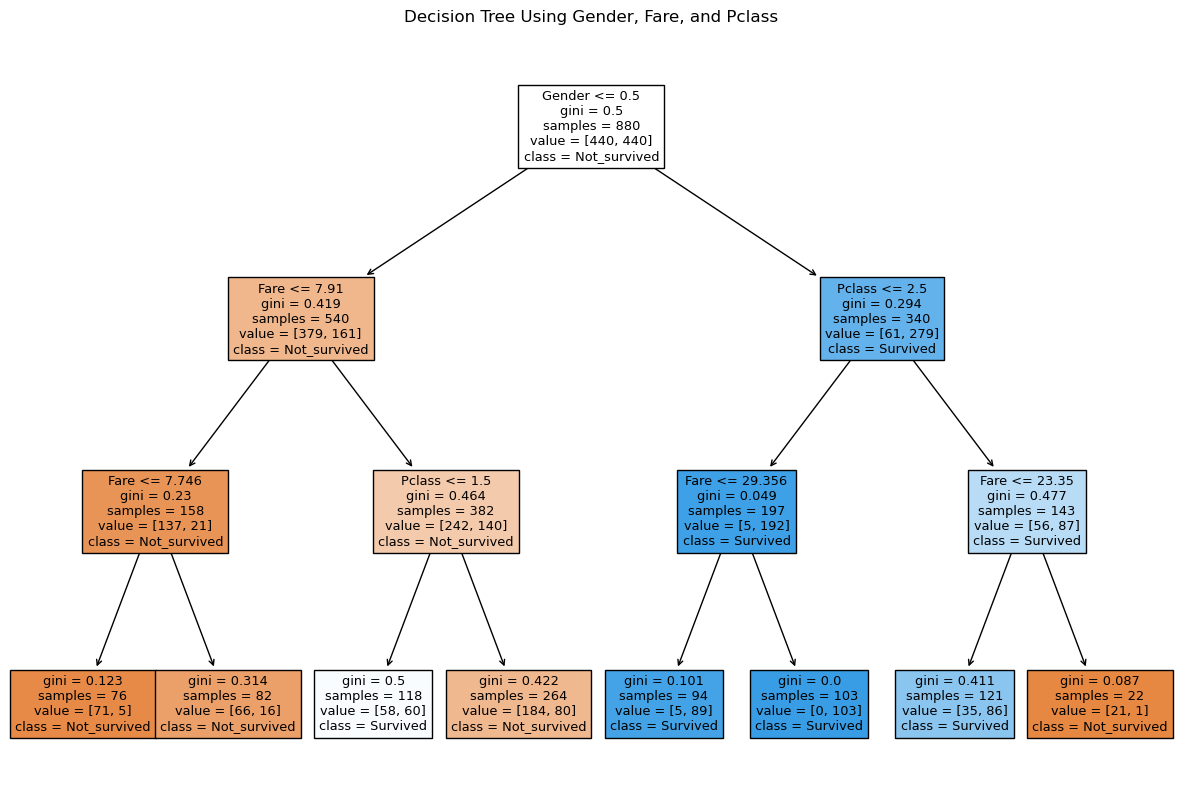

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(15,10))

# plot the decision tree 
plot_tree(decision_tree, filled=True, feature_names=['Gender','Fare','Pclass'],class_names = ["Not_survived", "Survived"])

# Set the title of the plot
plt.title("Decision Tree Using Gender, Fare, and Pclass")
plt.show()

## Cross-Validation 

### i. Logistic Regression

#### Lets first perform a cross-validation on the logistic regression with default parameters: penalty='L2'and C=1.

In [32]:
#Rebuild the model
nl_model = LogisticRegression();

# Cross-validation on the logistic model
cv_scores = cross_val_score(nl_model, X_train, y_train, cv=10)

#Print the cv scores
print(f"Cross-validation scores: {cv_scores}")

#Print the average scores
print(f"Average cross-validation score: {cv_scores.mean():.3f}")

Cross-validation scores: [0.69318182 0.75       0.73863636 0.80681818 0.71590909 0.73863636
 0.80681818 0.78409091 0.70454545 0.70454545]
Average cross-validation score: 0.744


#### To improve the model, find the best penality factor using the GridSearchCV tool in Skitlearn. 

In [33]:
from sklearn.model_selection import GridSearchCV
# List out the parameters that we want to test
param = {'C':[0.001, 0.01, 0.1, 1, 10]}

#Fit the model on the selected parameters
cv = GridSearchCV(nl_model, param).fit(X_train, y_train)

#Find the best the penalty factor
best_param=cv.best_params_
print(f"Best_penalty_factor: {best_param}")

#Rebuild the model using the best penalty factor
nl_model = LogisticRegression(C=0.1);

# Cross-validation on the logistic model
cv_scores = cross_val_score(nl_model, X_train, y_train, cv=10)

#Print the cv scores
print(f"Cross-validation scores: {cv_scores}")

#Print the average scores
print(f"Average cross-validation score: {cv_scores.mean():.3f}")


Best_penalty_factor: {'C': 0.1}
Cross-validation scores: [0.69318182 0.75       0.73863636 0.80681818 0.71590909 0.73863636
 0.79545455 0.78409091 0.70454545 0.70454545]
Average cross-validation score: 0.743


Based on the two models above, the second model with a penalty factor of 0.1 seems to perform better than the first model. The average cross-validation score increased from 0.750 to 0.751

### ii. Nearest Neighbor

#### Conduct a cross validation on the K-Nearest neighbor(kNN) classifier model using the default parameters of the kNN classsifier of n_neighbors=5. 

In [34]:
# Rebuild the model.
neighbors = KNeighborsClassifier(n_neighbors = 5)

# Cross-validation on the  k-Nearest-Neighbors model
cv_scores = cross_val_score(kNclassifier, X_train, y_train, cv=10)

#Print the cv scores
print(f"Cross-validation scores: {cv_scores}")

#Print the average scores
print(f"Average cross-validation score: {cv_scores.mean():.3f}")

Cross-validation scores: [0.70454545 0.69318182 0.73863636 0.79545455 0.71590909 0.76136364
 0.76136364 0.72727273 0.72727273 0.75      ]
Average cross-validation score: 0.738


#### To improve the model, find the best number of nearest neighbors to use in the k-Nearest Neighbor Classifier using the GridSearchCV tool in Skitlearn. 

In [35]:
# List out the parameters that we want to test
paramkNN = [1,5, 6, 9, 15, 25, 39, 59]

#Rebuild the model using the best penalty factor
for k in paramkNN:
    neighbors= KNeighborsClassifier(n_neighbors = k)

    # Cross-validation on the logistic model
    cv_scores = cross_val_score(neighbors, X_train, y_train, cv=10)
    
    #Print the average scores
    print(f"k =   {k},  Average cross-validation score: {cv_scores.mean():.3f}")

k =   1,  Average cross-validation score: 0.736
k =   5,  Average cross-validation score: 0.738
k =   6,  Average cross-validation score: 0.725
k =   9,  Average cross-validation score: 0.713
k =   15,  Average cross-validation score: 0.700
k =   25,  Average cross-validation score: 0.715
k =   39,  Average cross-validation score: 0.676
k =   59,  Average cross-validation score: 0.672


Increasing  the n_neighbors count, decreases the average cross validation score. Thus, there is no significant improvement that is seen after cross validating the model with values greater than 5 for the parameter n_neighbors. A reason for this observation is because the greater the number of neighbors that is being used to classify the label for a data point, the higher the probability to obtain a mode that is different from the correct label as it is k-nearest neighbors of a large k will possess greater variability. Thus, it can be seen that when k = 1, the cross validation score  of 0.749 is the greater than the cross validation score of the default k=5, which was 0.741,  as the label of the data point is based on the label of one nearest neighbors as opposed to 5 nearest neighbors that will lead to lower variability in the data set and lead to more accurate predictions. 

### iii. Decision-Tree

A. First, build the tree with the default parameters: the class has a weight of 1 and no specified max_depth.

In [36]:
#Construct a new decision tree
new_tree=DecisionTreeClassifier()

# Cross-validation on the decision-tree model
cv_scores = cross_val_score(new_tree,X_train, y_train, cv=10)

#Print the cv scores
print(f"Cross-validation scores: {cv_scores}")

#Print the average scores
print(f"Average cross-validation score: {cv_scores.mean():.3f}")

Cross-validation scores: [0.72727273 0.81818182 0.80681818 0.89772727 0.82954545 0.85227273
 0.875      0.92045455 0.80681818 0.79545455]
Average cross-validation score: 0.833


B. Let's now experiment with different max_depth and set the class_weight to 'balanced' and calculate their average cross-validation scores. 

In [37]:
# An array of the max_depths
max_depth = [1, 2, 3, 4, 5]

#Iterate a loop that calculates the average cross-validation score with different max depths 
for depth in max_depth:
    # Construct a decision tree with specified depth
    tree = DecisionTreeClassifier(max_depth=depth, class_weight="balanced")
    
    # Cross_validate the tree
    scores = cross_val_score(tree, X_train, y_train, cv=10)
    
    # Display the average cross validation score
    print("Max_Depth = {}-> Average cross_validation_score = {:.2f}".format(depth, scores.mean()))

Max_Depth = 1-> Average cross_validation_score = 0.75
Max_Depth = 2-> Average cross_validation_score = 0.74
Max_Depth = 3-> Average cross_validation_score = 0.76
Max_Depth = 4-> Average cross_validation_score = 0.78
Max_Depth = 5-> Average cross_validation_score = 0.76


From the results shown above, it seems that the max_depth of 5 gives the best decision tree results, as it has the highest cross-validation score (0.79). Compared with the f-score of the decision tree we built in the previous section, this new tree seems to produce better results after modifying its maximum depth and setting a balanced class weight for all its features. Although the tree we constructed in part A of this section gave a high average-cross validation score of 0.859, it is important to note that this model might not be the best to use as there is no maximum depth set. In other words, the decision tree will stretch until the leaf nodes come to an classification. As a result of this, the model might lead to overfitting, leading to high variance in the predictions.

# Conclusion: 
At the end of this Exploratory Data Analysis and modeling project, we have learned that the top three most correlated features in the Titanic's dataset were "Gender", "Pclass" and "Fare". These three features revealed many interesting trends that were present in the survival rates of the passengers on the Titanic. After training and testing our models on the dataset, the best model that most accurately predicted the Survival classification of the testing data set was the Decision Tree model. 